<a href="https://colab.research.google.com/github/sakshamshil/Machine-Learning-Projects/blob/main/Diabetes_Prediction_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feeding various medical information like insulin level,bmi,etc along with whether patient have diabetes or not (labels) to the Support Vector Machine (Supervised model)

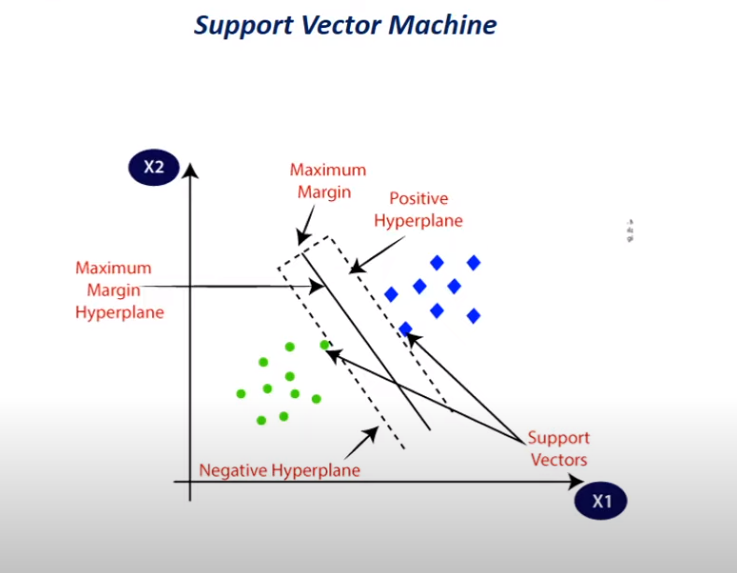



**WORK FLOW**

Diabetes Data -> Data Pre Processing (standardizing scales) -> Train Test Split -> Support Vector Machine Classifier

In [ ]:
#dependencies
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


Data Collection and Analysis

PIMA Diabetes Dataset, from kaggle

In [ ]:
diabetes_data = pd.read_csv('/content/diabetes.csv')

In [ ]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_data.shape

(768, 9)

In [ ]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
StandardScaler?

In [ ]:
svm?

In [ ]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 -> Non diabetic
1 -> Diabetic

In [ ]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


This shows that diabetic people have more glucose and insulin etc

In [ ]:
#Seperating data and label
X = diabetes_data.drop(columns = 'Outcome', axis = 1)
Y = diabetes_data['Outcome']

In [ ]:
print(X.head())
print("-------")
print(Y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
-------
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


**Data Standardisation**, feature scaling

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_dataa = scaler.transform(X)      #instead of doing it seperately can direcly use   .fittransform

In [ ]:
print(standardized_dataa)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_dataa

Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Train the model

In [ ]:
classifier = svm.SVC(kernel = 'linear')

In [ ]:
#training the support vector machine classifier
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model evaluation, by finding accuracy score

In [ ]:
X_train_prediction = classifier.predict(X_train)
X_train_accuracy = accuracy_score(X_train_prediction, Y_train)
print(X_train_accuracy*100)

78.33876221498372


In [ ]:
X_test_prediction = classifier.predict(X_test)
X_test_accuracy = accuracy_score(X_test_prediction, Y_test)
print(X_test_accuracy*100)

77.92207792207793


Predictor

In [ ]:
input_data = [3,126,88,41,235,39.3,0.704,27]
input_data_np = np.asarray(input_data).reshape(1,-1)
input_data_std = scaler.transform(input_data_np)

prediction = classifier.predict(input_data_std)
print("Diabetic" if prediction[0] == 1 else "Non-Diabetic")

Non-Diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


*About SVM*

A Support Vector Model is like finding that perfect line. It's not just any line, though – it's the line that maximizes the distance between the line itself and the nearest points from each group. These nearest points are called "support vectors," and they're like the most important points because they help define where the line goes.

The idea is that this special line not only separates the points but also creates a good amount of space between the two groups. This space is called the "margin." It's like having a safety buffer so that even if you add new points later, they are more likely to be classified correctly.

Now, here's the cool part: Support Vector Models work not only for points in two dimensions but for many dimensions. So, even if you can't see all the dimensions, the model figures out how to draw that decision boundary in a higher-dimensional space.

In simple terms, Support Vector Models help us draw a line (or decision boundary) between different groups of points while making sure we have a good gap between the groups. This way, when we have new points, we can predict which group they belong to based on which side of the line they fall on.





